## <font color='green'>Desafio de análise de dados</font>
Este notebook contém as respostas (e sua elaboração) acerca das questões apresentadas no desafio de processo seletivo da PMSP - Análise de dados (DEGOV - CGTIC - SMIT)

* A base de dados é proveniente do Portal de Dados Abertos da Prefeitura de São Paulo, encontra-se no link: http://dados.prefeitura.sp.gov.br/pt_PT/dataset/diagnostico-de-tic;
* Sendo utilizado, também, o dicionário de dados dos campos presentes nas tabelas;
* A apresentação de slides se encontra no arquivo <i><font color='blue'>data_analysis.slides.html</font></i>. Ao ser executado, será aberto pelo seu navegador padrão.

O projeto é de caráter introdutório. Visa responder, de maneira sucinta, as sete questões propostas. Contudo, esta base de dados ainda permite obter diversas outras análises e insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('diagnostico-tic-prefeitura-sp-2020.csv', sep=';', encoding='latin-1')

In [3]:
def color_string(string):
    return f'\033[94m{string}\033[00m'

def set_style_df(df):
    return df.style.set_properties(**{'text-align': 'left'}).hide()

def set_style_df2(df):
    df = set_style_df(df)
    return df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

## <font color='green'>Questão número 1</font>

#### Quantos órgãos responderam à pesquisa, por categoria?

In [4]:
quantidades = dict(dados['Q06'].value_counts())
set_style_df2(pd.DataFrame(quantidades.items(), columns=['Órgão', 'Qtde.']))

Órgão,Qtde.
Subprefeitura,32
Secretaria Municipal,24
"Autarquia, Fundação ou Empresa",15


## <font color='green'>Questão número 2</font>

#### Quantas pessoas trabalharam de forma dedicada à TI na Prefeitura de São Paulo?

In [5]:
print('Um total de {} pessoas.'.format(color_string(dados['Q201'].sum())))

Um total de 762 pessoas.


## <font color='green'>Questão número 3</font>

#### Qual proporção de pessoas trabalharam de forma dedicada à TI na Prefeitura de São Paulo por categoria?

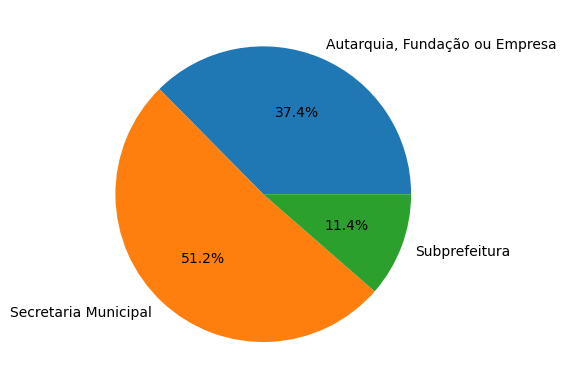

In [6]:
sub_df = pd.DataFrame(dados[['Q201', 'Q06']].groupby('Q06').sum())
plt.pie(sub_df['Q201'], labels=sub_df.index, autopct = '%.1f%%',)
# plt.title('Proporção de pessoas que trabalharam de forma dedicada à TI na PMSP', fontsize=14, pad=10)
plt.show()

## <font color='green'>Questão número 4</font>

#### Quantos órgãos utilizam alguma metodologia para gerenciamento de projetos?

In [13]:
qtde = color_string(dados['Q713'].value_counts()['Sim'])
print(f'Há um total de {qtde} órgãos.')

Há um total de 9 órgãos.


## <font color='green'>Questão número 5</font>

#### Considerando que todos os computadores locados possuem menos de 5 anos de uso, qual é a proporção de computadores que possuem mais de 5 anos e ainda são utilizados na Prefeitura de São Paulo?

In [8]:
dados.fillna(0, inplace=True)

proprios = dados['Q1001[SQ001_SQ008]'].sum()
locados = int(dados['Q1001[SQ001_SQ009]'].sum())
proprios_5 = dados['Q1002[SQ001]'].sum()
inserviveis = dados['Q604[SQ001]'].sum()

total = (locados + proprios) - inserviveis
porcento = proprios_5*100/total

print('Proporção de computadores em uso com mais de cinco anos é de {}%.'\
    .format(color_string(porcento.round(1))))

Proporção de computadores em uso com mais de cinco anos é de 55.9%.


## <font color='green'>Questão número 6</font>

#### Qual o total de ativos de rede que estão sob gestão direta dos órgãos da Prefeitura de São Paulo, por tipo?

In [9]:
list_labels = [
'Computador desktop', 
'Impressora sem scanner', 
'Impressora Multifuncional', 
'Notebook', 
'Tablet', 
'Celular Corporativo', 
'Projetor multimídia', 
'Scanner de produção', 
'Nobreak'
]

In [10]:
list_columns, list_sums = [], []

for column in dados.columns:
    if column.startswith('Q1001'):
        list_columns.append(column)

for i, column in enumerate(list_columns):
    if column.endswith('_SQ008]'):
        list_sums.append(int(dados[column].sum() + dados[list_columns[i+1]].sum()))

dict_totais_ativos_rede = dict(zip(list_labels, list_sums))

In [11]:
ativos_rede_df = pd.DataFrame(dict_totais_ativos_rede.items(), columns=['Equipamento', 'Qtde.'])
ativos_rede_df.sort_values(by='Qtde.', ascending=False, inplace=True)
set_style_df2(ativos_rede_df)

Equipamento,Qtde.
Computador desktop,46525
Notebook,24608
Celular Corporativo,6184
Impressora Multifuncional,3426
Impressora sem scanner,1912
Projetor multimídia,855
Nobreak,772
Tablet,327
Scanner de produção,214


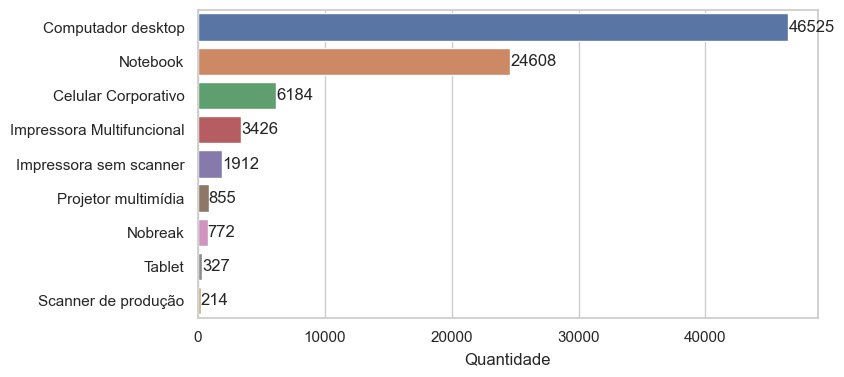

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=ativos_rede_df['Qtde.'], y=ativos_rede_df.Equipamento)
ax.set_xlabel('Quantidade', fontsize=12, labelpad=5)
ax.set_ylabel(None)
# ax.set_title('Ativos de rede que estão sob gestão direta da PMSP', fontsize=17, fontweight='bold', pad=30)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## <font color='green'>Questão número 7</font>

#### Considerando que os dados sobre quantidade de pessoas que trabalham dedicada à Tecnologia da Informação no ano de 2019 apresenta a seguinte distribuição no ano de 2019, complete a frase que aparece abaixo dos histogramas:

<img src='https://raw.githubusercontent.com/ihaveonesun/s_analysis_2K24/main/img_q7.png' width='70%'>

<i> "De acordo com o Diagnóstico de 2019, metade dos órgãos setoriais da prefeitura possuem, no máximo, <font color='blue'>TRÊS</font> pessoas trabalhando de forma dedicada à área de TI."</i>

## <font color='green'>Fim da apresentação</font>

Fontes consultadas:

* https://www.geeksforgeeks.org/align-columns-to-left-in-pandas-python/
* https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns    
* https://www.blog.pythonlibrary.org/2018/09/25/creating-presentations-with-jupyter-notebook/    